In [4]:
import numpy as np
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import os
from sklearn.preprocessing import normalize
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import scipy as sc

In [5]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images,
                               test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape(-1, 784)
test_images = test_images.reshape(-1, 784)

In [6]:
import pylab
def plot_color(matrix, labels, filename=""):
    x = matrix[:, 0].tolist()
    y = matrix[:, 1].tolist()
    plt.figure(figsize=(6, 6))
    pylab.scatter(x, y, c=labels, cmap='Dark2')
    if(len(filename) > 0): plt.savefig(filename)

In [7]:
def plot_with_labels(lowDWeights, labels, filename='tsne.png'):
    assert lowDWeights.shape[0] >= len(labels), "More labels than weights"
    label_c = np.array([i for i in range(10)])
    plt.figure(figsize=(10, 10))  # in inches
    for i, label in enumerate(labels):
        x, y = lowDWeights[i, :]
        plt.scatter(x, y, c=label_c)
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom'
                     )

    plt.savefig(filename)

In [8]:
weights_e0 = np.load("layer1_epoch_0.npy")
weights_e1 = np.load("layer1_epoch_1.npy")
weights_e2 = np.load("layer1_epoch_2.npy")
weights_e3 = np.load("layer1_epoch_3.npy")

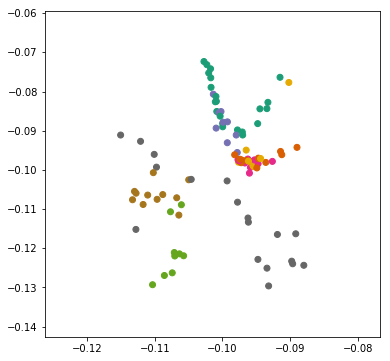

In [9]:
tsne = TSNE(perplexity=90, n_components=2, init='random', n_iter=5000)
lowD_1 = tsne.fit_transform(weights_e0[:100])
#plot_with_labels(lowD_1, test_labels[:100])
lowD_1= normalize(lowD_1, axis=0)
plot_color(lowD_1, test_labels[:100])

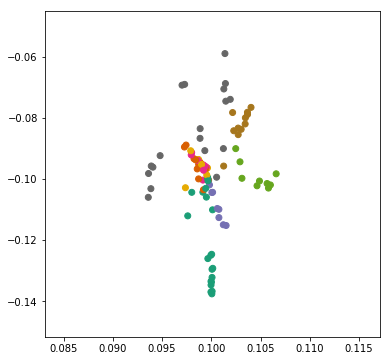

In [10]:
tsne.set_params(init=lowD_1)
lowD_2 = tsne.fit_transform(weights_e1[:100])
lowD_2 = normalize(lowD_2, axis=0)
#plot_with_labels(lowD_2, test_labels[:100])
plot_color(lowD_2, test_labels[:100])

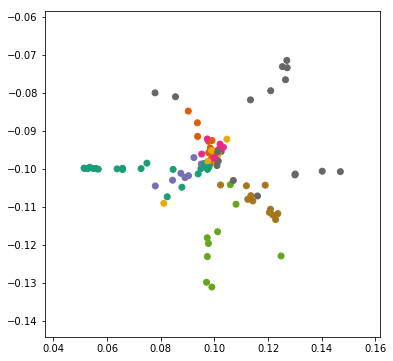

In [11]:
lowD_3 = tsne.fit_transform(weights_e2[:100])
lowD_3 = normalize(lowD_3, axis=0)
#plot_with_labels(lowD_3, test_labels[:100])
plot_color(lowD_3, test_labels[:100])

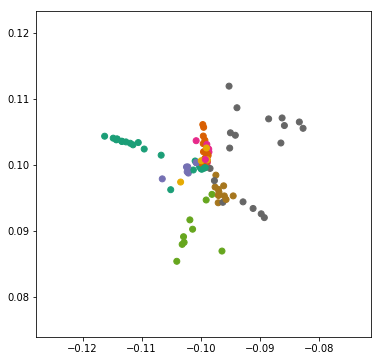

In [12]:
lowD_4 = tsne.fit_transform(weights_e3[:100])
lowD_4 = normalize(lowD_4, axis=0)
#plot_with_labels(lowD_3, test_labels[:100])
plot_color(lowD_4, test_labels[:100])

# Align as well

In [13]:
import alignment as al

In [19]:
source_matrix = al.find_all_centroids(lowD_1, test_labels[:100])
target_matrix = al.find_all_centroids(lowD_2, test_labels[:100])

In [37]:
print(lowD_1.shape, trans.shape)

(100, 2) (2, 2)


In [25]:
trans_cent = al.make_transform(source_matrix, target_matrix)
trans = al.make_transform(lowD_1, lowD_2)

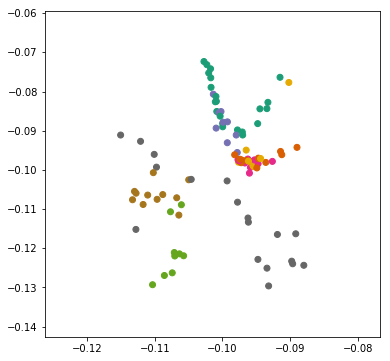

In [26]:
plot_color(lowD_1, test_labels[:100])

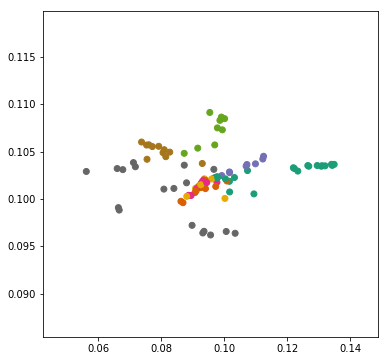

In [30]:
plot_color(al.apply_transform(lowD_2, trans_cent), test_labels[:100])

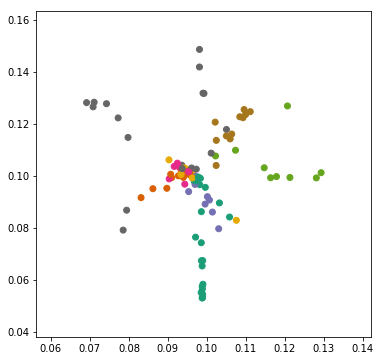

In [35]:
plot_color(al.apply_transform(lowD_3, trans), test_labels[:100])

# Try with second layer

In [18]:
weights_2_e0 = np.load("layer2_epoch_0.npy")
weights_2_e1 = np.load("layer2_epoch_1.npy")
weights_2_e2 = np.load("layer2_epoch_2.npy")
weights_2_e3 = np.load("layer2_epoch_3.npy")
weights_2_e4 = np.load("layer2_epoch_4.npy")

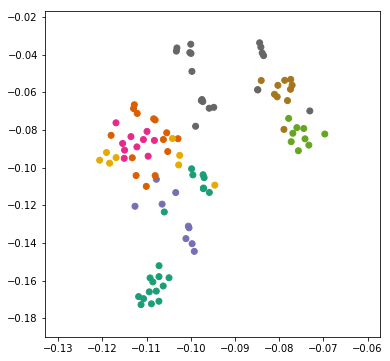

In [19]:
tsne = TSNE(perplexity=30, n_components=2, init='random', n_iter=5000)
lowD_2_1 = tsne.fit_transform(weights_2_e0[:100])
#plot_with_labels(lowD_1, test_labels[:100])
lowD_2_1= normalize(lowD_1, axis=0)
plot_color(lowD_2_1, test_labels[:100])

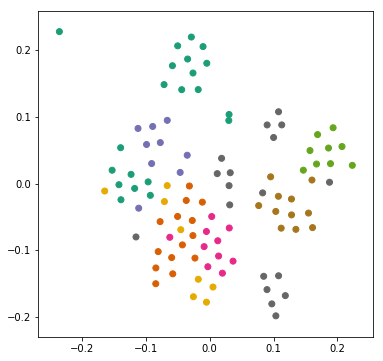

In [20]:
tsne.set_params(init=lowD_1)
lowD_2_2 = tsne.fit_transform(weights_2_e1[:100])
lowD_2_2 = normalize(lowD_2, axis=0)
#plot_with_labels(lowD_2, test_labels[:100])
plot_color(lowD_2_2, test_labels[:100])

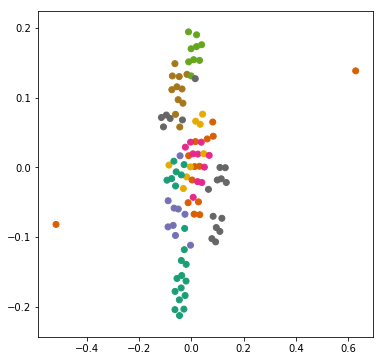

In [21]:
lowD_2_3 = tsne.fit_transform(weights_2_e2[:100])
lowD_2_3 = normalize(lowD_3, axis=0)
#plot_with_labels(lowD_3, test_labels[:100])
plot_color(lowD_2_3, test_labels[:100])

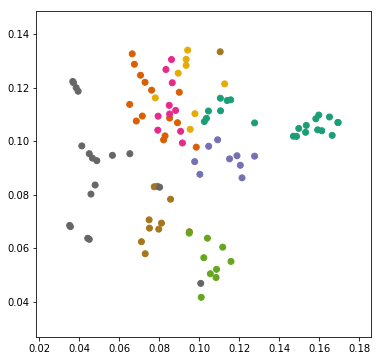

In [22]:
lowD_2_4 = tsne.fit_transform(weights_2_e3[:100])
lowD_2_4 = normalize(lowD_4, axis=0)
#plot_with_labels(lowD_3, test_labels[:100])
plot_color(lowD_2_4, test_labels[:100])

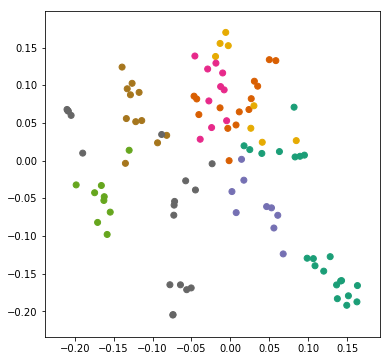

In [23]:
lowD_2_5 = tsne.fit_transform(weights_2_e4[:100])
lowD_2_5 = normalize(lowD_5, axis=0)
#plot_with_labels(lowD_3, test_labels[:100])
plot_color(lowD_2_5, test_labels[:100])

In [24]:
source_matrix = al.find_all_centroids(lowD_2_2, test_labels[:100])
target_matrix = al.find_all_centroids(lowD_2_1, test_labels[:100])

In [25]:
trans = al.make_transform(source_matrix, target_matrix)

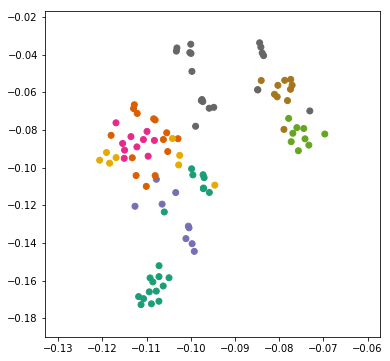

In [26]:
plot_color(lowD_2_1, test_labels[:100])

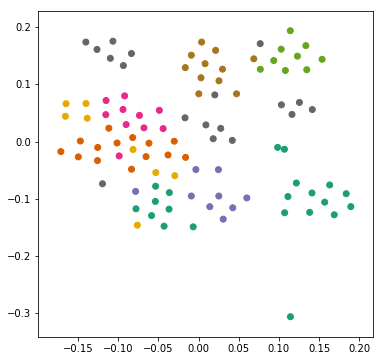

In [27]:
lowD_2_new = al.apply_transform(lowD_2_2, trans)
plot_color(al.apply_transform(lowD_2_2, trans), test_labels[:100])

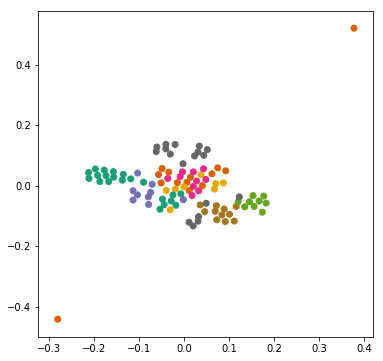

In [28]:
plot_color(al.apply_transform(lowD_2_3, trans), test_labels[:100])

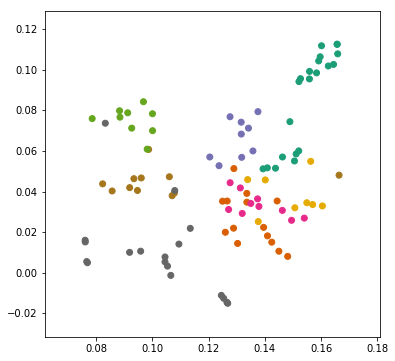

In [29]:
plot_color(al.apply_transform(lowD_2_4, trans), test_labels[:100])

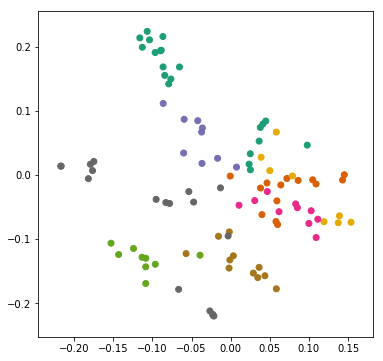

In [30]:
plot_color(al.apply_transform(lowD_2_5, trans), test_labels[:100])